In [242]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [243]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [244]:
# To know the dataframe's each attributes type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [245]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


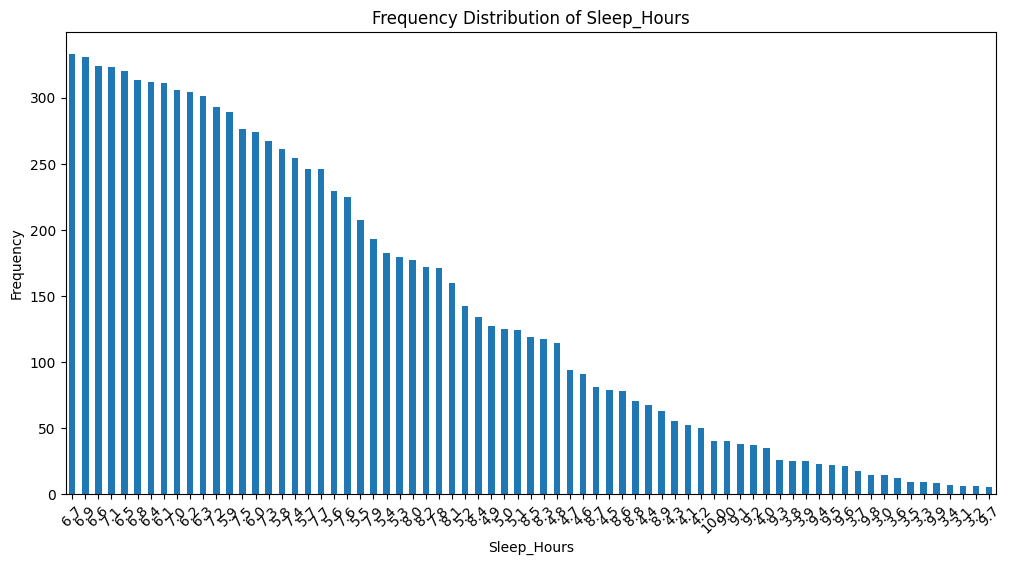

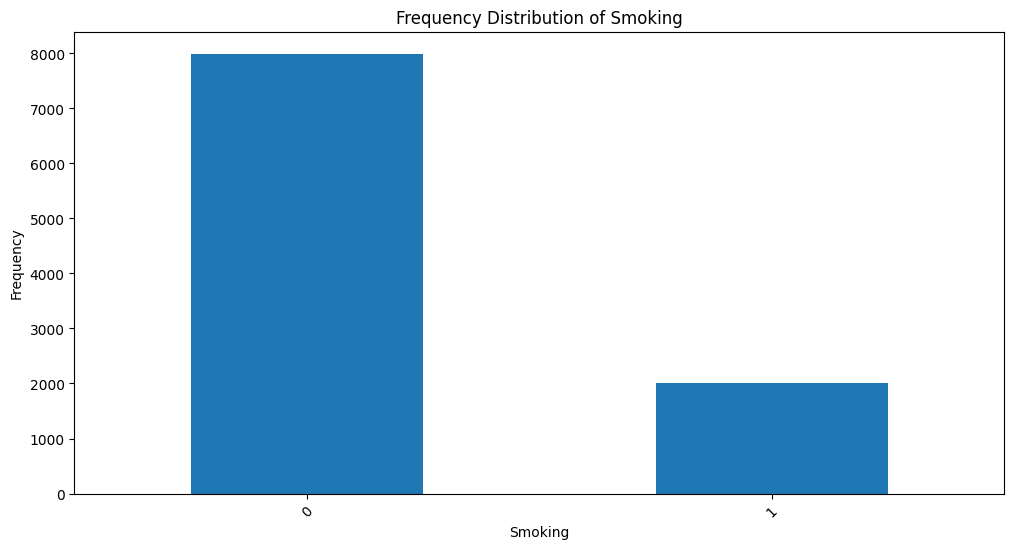

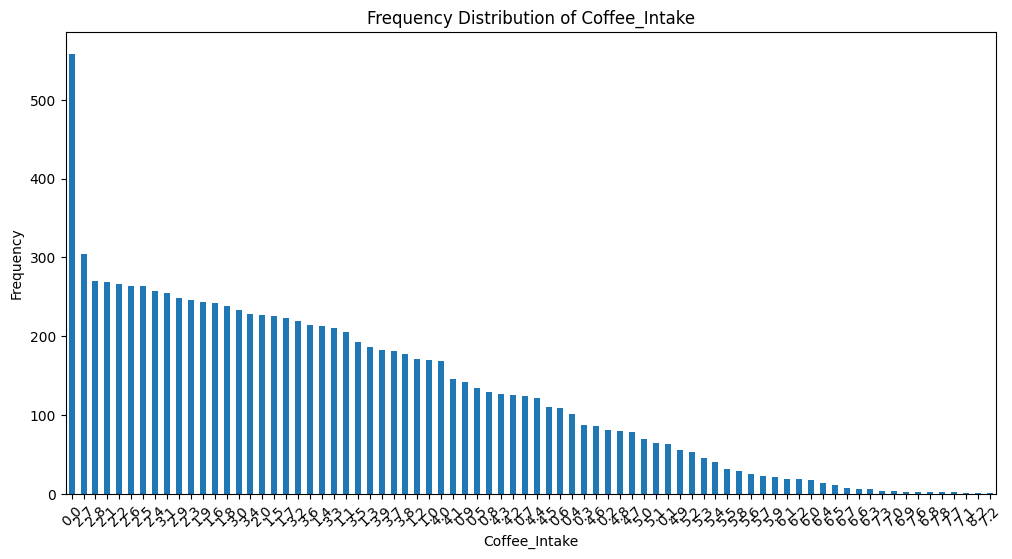

In [246]:
col_names = ['Sleep_Hours', 'Smoking',	'Coffee_Intake']

for col in col_names:
    df[col].value_counts().plot(kind='bar', figsize=(12,6))
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

For Sleep_Hours, the distribution shows that some sleep durations are clearly more common than others. The data is not evenly spread, but instead clusters around certain hours. Most people seem to fall into a “normal” sleep range, while very short or very long sleep durations occur less often.

The smoking chart is clearly skewed toward non-smokers. Smokers are present but onlyp a smaller portion. This indicates that smoking is less common among the participants overall.

As for Coffee_Intake, it suggest that coffee consumption is not evenly distributed. There are a few intake levels that dominate the dataset, while very high or very low consumption is less frequent.

In [247]:
# Check missing values in variables

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [248]:
# Check unique values for country
print(df["Country"].unique())

['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']


In [249]:
# Fill the null value in Heatlh_Issues
df["Health_Issues"].fillna("None", inplace=True)


# Do encoding based on the attributes
gender_map = {"Male": 1, "Female": 2, "Other": 3}
sleep_quality_map = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
stress_level_map = {"Low": 1, "Medium": 2, "High": 3}
health_issues_map = {"None": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
occupation_map = {"Office": 1, "Healthcare": 2, "Student": 3, "Service": 4, "Other": 5}

df["Gender"] = df["Gender"].map(gender_map)
df["Sleep_Quality"] = df["Sleep_Quality"].map(sleep_quality_map)
df["Stress_Level"] = df["Stress_Level"].map(stress_level_map)
df["Health_Issues"] = df["Health_Issues"].map(health_issues_map)
df["Occupation"] = df["Occupation"].map(occupation_map)

country_map = {"Germany": 1,"Brazil": 2,"Spain": 3,"Mexico": 4,"France": 5,"Canada": 6,"UK": 7,
               "Switzerland": 8,"Netherlands": 9,"Italy": 10,"China": 11,"Japan": 12,"Belgium": 13,
               "Finland": 14,"Australia": 15,"USA": 16,"Sweden": 17,"India": 18,"Norway": 19,"South Korea": 20}

df["Country"] = df["Country"].map(country_map)

print(df.head())


   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40       1        1            3.5        328.1          7.5   
1   2   33       1        1            1.0         94.1          6.2   
2   3   42       1        2            5.3        503.7          5.9   
3   4   53       1        1            2.6        249.2          7.3   
4   5   32       2        3            3.1        298.0          5.3   

   Sleep_Quality   BMI  Heart_Rate  Stress_Level  Physical_Activity_Hours  \
0              3  24.9          78             1                     14.5   
1              3  20.0          67             1                     11.0   
2              2  22.7          59             2                     11.2   
3              3  24.7          71             1                      6.6   
4              2  24.1          76             2                      8.5   

   Health_Issues  Occupation  Smoking  Alcohol_Consumption  
0              0           5        0      

/tmp/ipython-input-2184687041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Health_Issues"].fillna("None", inplace=True)


In [250]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,0,5,0,0
1,2,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,0,4,0,0
2,3,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,1,1,0,0
3,4,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,1,5,0,0
4,5,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,1,3,0,1


In [251]:
# Check missing values in variables

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [252]:
# Now that all clear. I'll drop ID since we don't need it for the model.
df = df.drop(columns=["ID"])

In [253]:
# Since this model is used to predict a person's health issue. I'm going to assign health_issue as Y and drop the health_issues on X
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [254]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,1,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,3,0,1


In [255]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


## Split data into separate training and test set

In [256]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [257]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

## Train a Decision Tree Classifier


In [258]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [259]:
# Make a model based on the criterion GINI
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [260]:
# And Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Predist the Test set results with GINI and Entropy criterion

In [261]:
y_pred_gini = clf_gini.predict(X_test)

y_pred_entropy = clf_entropy.predict(X_test)

### Check the accyracy score between the two criterion

In [262]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion GINI index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion Entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion GINI index: 0.9965
Model accuracy score with criterion Entropy index: 0.9965


### Visualize the decision tree

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

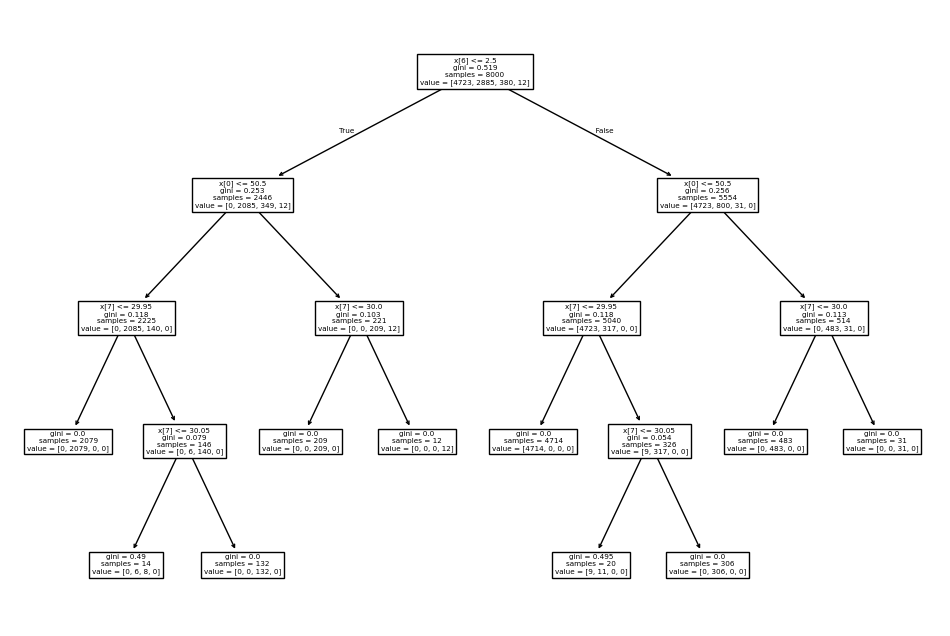

In [263]:
# GINI
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

[Text(0.5, 0.9, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\nentropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'entropy = 0.985\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False')

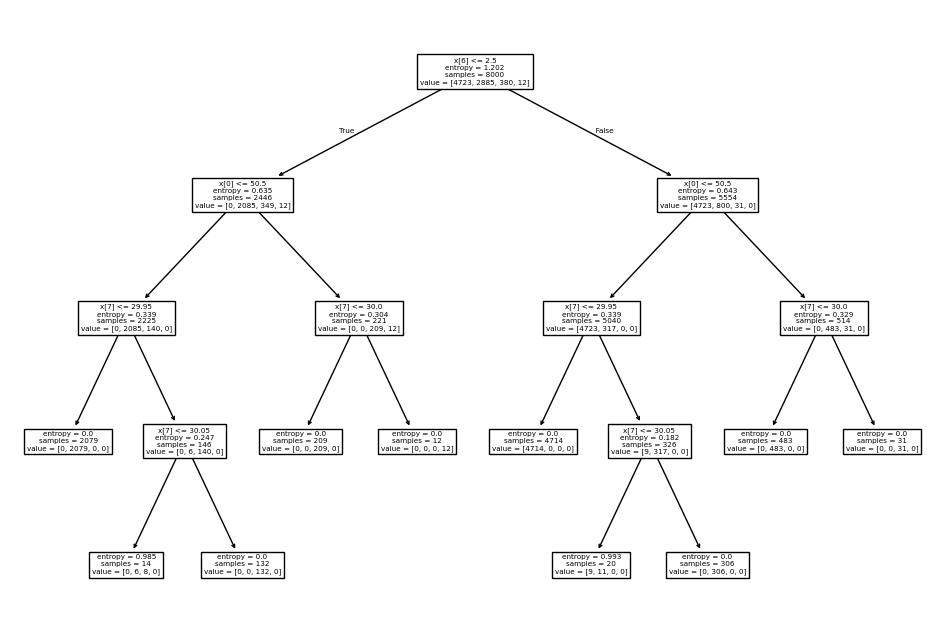

In [264]:
# Entropy
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train))

## Train a Naive Bayes Classifier

In [265]:
# Create the model
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [266]:
# Make a prediction
y_pred_nb = nb_classifier.predict(X_test)

### Check the accuracy

In [267]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8585


## Now compare all the performance accuracy

In [268]:
print('Model accuracy score with criterion GINI index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion Entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))
print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with criterion GINI index: 0.9965
Model accuracy score with criterion Entropy index: 0.9965
Model accuracy score with naive bayes: 0.8585


We could see that both gini and entropy have the same amount of high accuracy. Hence, we'll able to use either gini or entropy model to predict new records

## Predict new unlabeled record

In [270]:
# Make a prediction with the model

# Input values: age 28, gender Male, country Brazil, occupation Student,
# daily coffee intake 3, caffeine 280 mg, sleep 5 hours, sleep quality Poor,
# BMI 25.4, heart rate 85, stress High, physical activity 2 hrs,
# smoking Yes, alcohol Yes

# These values need to be encoded according to the maps created earlier
input_data = {
    "Age": 28,
    "Gender": gender_map["Male"],
    "Country": country_map["Brazil"],
    "Coffee_Intake": 3,
    "Caffeine_mg": 280,
    "Sleep_Hours": 5,
    "Sleep_Quality": sleep_quality_map["Poor"],
    "BMI": 25.4,
    "Heart_Rate": 85,
    "Stress_Level": stress_level_map["High"],
    "Physical_Activity_Hours": 2,
    "Occupation": occupation_map["Student"],
    "Smoking": 1,
    "Alcohol_Consumption": 1
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the model
prediction = clf_gini.predict(input_df)

print("Prediction (numeric):", prediction[0])

# Decode back to label
inverse_health_issues_map = {v: k for k, v in health_issues_map.items()}
print(f"The predicted class for the given input is: {inverse_health_issues_map[prediction[0]]}")


Prediction (numeric): 1
The predicted class for the given input is: Mild
